# Recommender Systems

Objectives:

At the end of this ICE, you will be able to:

* build a simple content-based recommender

* build a simple user-based collaborative filter

## Recommender System

Recommender Systems (RSs) are software, tools, and techniques providing suggestions for items to be of use to a user. The suggestions relate to various decision-making processes: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. In the educational world, the most common application of RSs is to recommend appropriate learning resources (e.g., readings, projects, practices, courses) to a learner.

As you can imagine, RSs is a field that has exists a long time with many different branches. The purpose of this ICE is not to make you an expert in building recommender system models. Instead, it is designed to get you started by giving you an high-level overview of two types of common RSs implementations (i.e., content-based recommender and collaborative filter) that exist and how you can build one by yourself.

## Building an RS for Learning Modules

Suppose that we have a self-guided LA course with seven units that learners can choose based on their preference. Our purpose is to make recommendations to learners based on their interest and preference. We have collected some ratings of the units from previous learners in terms of both interest and difficulty.


Let's start by loading both the interest and difficulty csv files:

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [74]:
os.getcwd()

'/Users/ruoqiwang/Documents/CU/HUDK4051/ICES/ICE4'

In [75]:
interest = pd.read_csv("interest.csv")
difficulty = pd.read_csv("difficulty.csv")

In both dataset, student names are anonymized and seven topics (i.e., prediction, nlp, sna, neural networks, data visualization, sql, and closing the loop of learning analytics) are rated on a Likert scale from 1-5 (i.e., 1 being the least interested/difficult). Feel free to do some exploratory analysis to get to know the dataset a bit better as you wish.

In [76]:
# Exploratory analysis here

Your data wrangling task is to create a dataset with rows being the seven units while the columns are the mean of the difficulty ratings and the interest ratings.

In [77]:
interest

,id,prediction.interest,nlp.interest,sna.interest,neural.interest,viz.interest,loop.interest,sql.interest
0,s1,5,5.0,4,5.0,2,4.0,5.0
1,s2,5,5.0,5,5.0,5,5.0,5.0
2,s3,5,5.0,5,5.0,5,4.0,4.0
3,s4,4,5.0,5,5.0,5,5.0,5.0
4,s5,4,4.0,4,5.0,4,4.0,5.0
5,s6,5,5.0,5,5.0,5,5.0,5.0
6,s7,4,5.0,3,5.0,4,5.0,4.0
7,s8,4,4.0,3,4.0,5,4.0,4.0
8,s9,5,4.0,2,5.0,5,5.0,5.0
9,s10,5,5.0,5,5.0,5,4.0,5.0


In [78]:
interest_describe = interest.describe(include = 'all')
interest_describe 

,id,prediction.interest,nlp.interest,sna.interest,neural.interest,viz.interest,loop.interest,sql.interest
count,52,52.000000,51.000000,52.000000,51.000000,52.000000,51.000000,51.000000
unique,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.326923,4.431373,4.134615,4.490196,4.596154,4.431373,4.431373
std,NaN,1.042643,0.781150,1.048413,0.809260,0.773574,0.781150,0.922061
min,NaN,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000
25%,NaN,4.000000,4.000000,3.000000,4.000000,4.750000,4.000000,4.000000
50%,NaN,5.000000,5.000000,4.500000,5.000000,5.000000,5.000000,5.000000
75%,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [79]:
mean_interest = interest_describe.iloc[4]
mean_interest

id                          NaN
prediction.interest    4.326923
nlp.interest           4.431373
sna.interest           4.134615
neural.interest        4.490196
viz.interest           4.596154
loop.interest          4.431373
sql.interest           4.431373
Name: mean, dtype: object

In [80]:
mean_interest = interest_describe.iloc[4:5]
mean_interest

,id,prediction.interest,nlp.interest,sna.interest,neural.interest,viz.interest,loop.interest,sql.interest
mean,NaN,4.326923,4.431373,4.134615,4.490196,4.596154,4.431373,4.431373


In [81]:
mean_interest_transposed = mean_interest.T 
mean_interest_transposed

,mean
id,NaN
prediction.interest,4.326923
nlp.interest,4.431373
sna.interest,4.134615
neural.interest,4.490196
viz.interest,4.596154
loop.interest,4.431373
sql.interest,4.431373


In [82]:
difficulty 

,id,prediction.difficulty,nlp.difficulty,sna.difficulty,neural.difficulty,viz.difficulty,loop.difficulty,sql.difficulty
0,s1,4,5.0,3,5.0,3.0,3.0,5.0
1,s2,5,5.0,5,5.0,5.0,5.0,5.0
2,s3,3,3.0,3,3.0,3.0,3.0,2.0
3,s4,3,4.0,4,4.0,4.0,5.0,3.0
4,s5,4,4.0,4,5.0,4.0,4.0,4.0
5,s6,5,5.0,5,5.0,5.0,5.0,5.0
6,s7,3,4.0,4,4.0,4.0,4.0,4.0
7,s8,4,5.0,4,4.0,4.0,5.0,4.0
8,s9,3,3.0,2,5.0,3.0,4.0,5.0
9,s10,3,5.0,3,4.0,4.0,5.0,2.0


In [83]:
difficulty_describe = difficulty.describe(include = 'all')
difficulty_describe

,id,prediction.difficulty,nlp.difficulty,sna.difficulty,neural.difficulty,viz.difficulty,loop.difficulty,sql.difficulty
count,52,52.000000,50.00000,52.000000,50.000000,50.000000,50.000000,49.000000
unique,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.807692,4.22000,3.769231,4.400000,4.060000,4.080000,3.693878
std,NaN,0.864064,0.86402,0.899137,0.782461,0.818411,0.829064,1.103103
min,NaN,2.000000,2.00000,2.000000,2.000000,3.000000,3.000000,1.000000
25%,NaN,3.000000,4.00000,3.000000,4.000000,3.000000,3.000000,3.000000
50%,NaN,4.000000,4.00000,4.000000,5.000000,4.000000,4.000000,4.000000
75%,NaN,5.000000,5.00000,4.250000,5.000000,5.000000,5.000000,5.000000


In [84]:
mean_difficulty = difficulty_describe.iloc[4]
mean_difficulty

id                            NaN
prediction.difficulty    3.807692
nlp.difficulty               4.22
sna.difficulty           3.769231
neural.difficulty             4.4
viz.difficulty               4.06
loop.difficulty              4.08
sql.difficulty           3.693878
Name: mean, dtype: object

In [85]:
mean_difficulty = difficulty_describe.iloc[4:5]
mean_difficulty

,id,prediction.difficulty,nlp.difficulty,sna.difficulty,neural.difficulty,viz.difficulty,loop.difficulty,sql.difficulty
mean,NaN,3.807692,4.22,3.769231,4.4,4.06,4.08,3.693878


In [86]:
mean_difficulty_transposed = mean_difficulty.T 
mean_difficulty_transposed

,mean
id,NaN
prediction.difficulty,3.807692
nlp.difficulty,4.22
sna.difficulty,3.769231
neural.difficulty,4.4
viz.difficulty,4.06
loop.difficulty,4.08
sql.difficulty,3.693878


In [87]:
mean_interest_transposed

,mean
id,NaN
prediction.interest,4.326923
nlp.interest,4.431373
sna.interest,4.134615
neural.interest,4.490196
viz.interest,4.596154
loop.interest,4.431373
sql.interest,4.431373


In [88]:
mean_interest_transposed_rename = mean_interest_transposed.rename(index={"prediction.interest": "prediction", "nlp.interest": "nlp", "sna.interest": "sna", "neural.interest":"neural","viz.interest": "viz","loop.interest":"loop","sql.interest":"sql"})
mean_interest_transposed_rename

,mean
id,NaN
prediction,4.326923
nlp,4.431373
sna,4.134615
neural,4.490196
viz,4.596154
loop,4.431373
sql,4.431373


In [89]:
mean_interest_transposed_rename = mean_interest_transposed_rename.rename(columns = {"mean":"interest"})
mean_interest_transposed_rename

,interest
id,NaN
prediction,4.326923
nlp,4.431373
sna,4.134615
neural,4.490196
viz,4.596154
loop,4.431373
sql,4.431373


In [90]:
mean_difficulty_transposed_rename = mean_difficulty_transposed.rename(index={"prediction.difficulty": "prediction", "nlp.difficulty": "nlp", "sna.difficulty": "sna", "neural.difficulty":"neural","viz.difficulty": "viz","loop.difficulty":"loop","sql.difficulty":"sql"})
mean_interest_transposed_rename

,interest
id,NaN
prediction,4.326923
nlp,4.431373
sna,4.134615
neural,4.490196
viz,4.596154
loop,4.431373
sql,4.431373


In [91]:
mean_difficulty_transposed_rename = mean_difficulty_transposed_rename.rename(columns = {"mean":"difficulty"})
mean_difficulty_transposed_rename

,difficulty
id,NaN
prediction,3.807692
nlp,4.22
sna,3.769231
neural,4.4
viz,4.06
loop,4.08
sql,3.693878


In [92]:
result = pd.concat([mean_difficulty_transposed_rename, mean_interest_transposed_rename ], axis=1, join='inner')
result

,difficulty,interest
id,NaN,NaN
prediction,3.807692,4.326923
nlp,4.22,4.431373
sna,3.769231,4.134615
neural,4.4,4.490196
viz,4.06,4.596154
loop,4.08,4.431373
sql,3.693878,4.431373


In [95]:
difficulty_interest = result.iloc[1:8]
difficulty_interest

,difficulty,interest
prediction,3.807692,4.326923
nlp,4.22,4.431373
sna,3.769231,4.134615
neural,4.4,4.490196
viz,4.06,4.596154
loop,4.08,4.431373
sql,3.693878,4.431373


## Content-Based Recommender

Content-based recommenders suggest similar items based on a particular item. This system uses item metadata, such as ratings, description, comments, etc. to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, they will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.

In that sense, our task is simplied to identifying the similar items (i.e., LA units) in our dataset. Does that sound familiar to you? Yes, any distance-based algorithms (e.g., KNN) will be great for measuring similarities. If you just want to do some simple explorations, clustering is also a good place to start.

In our case, the metadata only consists of the difficulty and the interest, which makes it easy to plot:

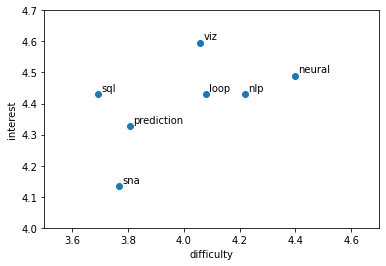

In [102]:
# Plot the basic scatter plot
plt.scatter(difficulty_interest.difficulty, difficulty_interest.interest)

# Add lables to each point
for i, index in enumerate (difficulty_interest.index):
    plt.text(difficulty_interest.difficulty[i] + 0.01, difficulty_interest.interest[i]+0.01, index)
    
# Adjust the axis limit and label
plt.xlim (3.5, 4.7)
plt.ylim (4.0, 4.7)
plt.xlabel("difficulty")
plt.ylabel("interest");

##### plt.text here means the the distance(position) + 0.01 is to look prettier (not too overlapped) and index(name) 
can google it for the further explanation 

Following the same idea of KNN, we can measure the distance (distance measure will do) of any given point to the rest of the points in the dataset. The algorithm below is not the most effective way to acomplish this task, but it should be fairly easy to read.

In [103]:
import math # You will need math library to calculate the eulidician distance

# Create a new column called distance. And assign 0 to all rows temporarily.
difficulty_interest_distance = difficulty_interest.copy()
difficulty_interest_distance['distance'] = 0

# Pick any row to start. Here I am using prediction as an example
item = difficulty_interest_distance.loc['prediction',]

# Loop around the data frame index; Obtain the target row; Calculate the distance
# Assign to d; And assign to the corresponding cell.
for i in difficulty_interest_distance.index:
    target = difficulty_interest_distance.loc[i,]
    d = math.dist(item, target)
    difficulty_interest_distance.loc[i, 'distance'] = d

# Sort the result by distance
difficulty_interest_distance.sort_values('distance', ascending=True)

,difficulty,interest,distance
prediction,3.807692,4.326923,0.000000
sql,3.693878,4.431373,0.154478
sna,3.769231,4.134615,0.196116
loop,4.08,4.431373,0.291652
viz,4.06,4.596154,0.368977
nlp,4.22,4.431373,0.425332
neural,4.4,4.490196,0.614399


Based on the distance, prediction is mostly similar to sql considering both the difficulty and the interest while neural is the least similar. As a result, based on the current item prediction, we would recommend sql.

Another popular way in RSs implementation is to use the cosine similarity to measure the distance. The cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. You use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

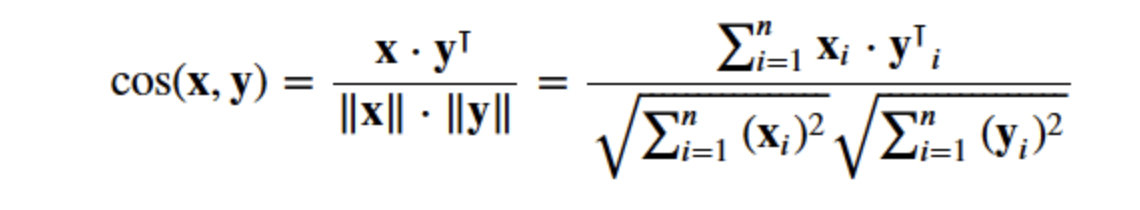

In [104]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(difficulty_interest)
cosine_sim

array([[1.        , 0.99922723, 0.99984605, 0.99856397, 0.99999823,
        0.99974724, 0.99964159],
       [0.99922723, 1.        , 0.99976308, 0.99989801, 0.99929948,
        0.99985835, 0.99781682],
       [0.99984605, 0.99976308, 1.        , 0.99935025, 0.99987732,
        0.99998782, 0.99901794],
       [0.99856397, 0.99989801, 0.99935025, 1.        , 0.99866309,
        0.999516  , 0.99677186],
       [0.99999823, 0.99929948, 0.99987732, 0.99866309, 1.        ,
        0.99978781, 0.99958939],
       [0.99974724, 0.99985835, 0.99998782, 0.999516  , 0.99978781,
        1.        , 0.99878705],
       [0.99964159, 0.99781682, 0.99901794, 0.99677186, 0.99958939,
        0.99878705, 1.        ]])

Once we have the similarity matrix, the rest of the tasks are easy. We can encapsulate the recommendation procedure into one function. The function needs to:

- Get the index of the module given its title.
- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position, and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 5 elements of this list. Ignore the first element as it refers to self (the module is most similar to itself).
- Return the names corresponding to the indices of the top elements.

In [105]:
# Before we move forward, we need to create a index for the module
module_indices = pd.Series(range(len(difficulty_interest.index)), index = difficulty_interest.index)

module_indices

prediction    0
nlp           1
sna           2
neural        3
viz           4
loop          5
sql           6
dtype: int64

In [106]:
def get_recommendations(name, cosine_sim, matrix_indices):
    # Get the index of the movie that matches the title
    idx = matrix_indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    rank_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return matrix_indices.iloc[rank_indices]

Now, we can make a quick query to find out which items are most similar to any given item. Based on the cosine similarity measure, this time viz is mostly similar to prediction. But the top four choice is quite similar to the nearest neighbor method measured by euclidean distance.

In [111]:
get_recommendations("prediction", cosine_sim, module_indices)

viz     4
sna     2
loop    5
sql     6
nlp     1
dtype: int64

In [110]:
get_recommendations("sna", cosine_sim, module_indices)

loop          5
viz           4
prediction    0
nlp           1
neural        3
dtype: int64

However, it is worth noting that, the data do not have a whole lot of variabilities -- all the means are actually quite similar, so it is not surprising that the recommendations by two methods are not in the same order. Another important thing to make is that there are several additional similarity metrics that you can use for this, such as the manhattan and Pearson. But there is no right answer to which score is the best. Different scores work well in different scenarios, and it is often a good idea to experiment with different metrics and observe the results. In our case, euclidean distance is probably a better choice.

### Collaborative Filter

In constrast to content-based recommender, collaborative filter (CF) relies on the dynamic input of the user data and make recommendations. Collaborative filters can further be classified into two types:
- Item-based Filtering: This type of CF is extremely similar to the content recommendation engine that we have seen previously. Item-based CF identifies similar items based on how people have assessed it in the past. For example, if Alice, Bob, and Eve have given 5 stars to the prediction module and sql module, the system identifies the items as similar. Therefore, if someone buys prediction module, the system also recommends sql module to them. This assessment can change over time based on the incoming data and reflect the current trend. In contrast, content-based recommenders rely more on static and descriptive data. So in this sense, what we have built previously can also be called an item-based CF.
- User-based Filtering: This type of CT recommends item to a user that similar users have liked. For example, let's say Alice and Bob have a similar interest in prediction methods, sql, and neural networks -- they are similar people. The record shows that Alice also liked the SNA module, then we can infer that Bob probably will also like the SNA module.

The process is actually quite similar: Instead of evaluating on the similartity of content, we evaluate on the similarity of users. The following code evaluates the five most similar person to s5 in descending order. On the other hand, if we arrange the interest in ascending order, we will get recommendations that is not necessarily the first choice, which is often referred as serendipity.

In [112]:
# First we need to clean up the dataset a little bit: Removing NaNs and naming rows
interest_na = interest.dropna()
interest_na.index = interest_na.id
interest_clean = interest_na.drop('id', axis=1)

In [113]:
# Obtain the cosine similarity matrix
cosine_sim_interest = cosine_similarity(interest_clean, interest_clean)
# Create an index for the student list
id_indices = pd.Series(range(len(interest_clean.index)), index = interest_clean.index)

In [114]:
# Recycle the get_recommendations() that we have created
get_recommendations("s5", cosine_sim_interest, id_indices)

id
s2      1
s6      5
s12    11
s13    12
s16    15
dtype: int64

However, educational settings have important differences to purely commercial settings such as film or product suggestions. In regular commercial settings, similar/related products are good enough. However, in education, we would often want to plan the learning trajectory that moves learners forward instead of recommending the simple choices repeatedly or serendipitous choices that is too hard for learners.

One solution is to include different measures to reflect a more comprehensive view of relations among users/items. As we have discussed previously in 4050, more data is great, but high dimensionality sometimes can be a [Curse](url='https://en.wikipedia.org/wiki/Curse_of_dimensionality'). Dimensional reduction method such as PCA or singular value decomposition (SVD, a quite frequently used algorithm in RSs) can help you stay focused.


Another way out is [knoweldge-based RSs](url='https://medium.com/@jwu2/knowledge-based-recommender-systems-an-overview-536b63721dba'). This type of systems rely heavily on the domain knowledge and the production rules, which may not sound as "data-mining" as the other ways. However, in practice, knowledge-based RSs often yield promising results and can avoid many technical challenges (e.g., data sparsity, cold-start problem).

Finally, in reality, we often develop hybrid systems that combine various techniques. For example, a hybrid system combining techniques A and B tries to use the advantages of A to fix the disadvantages of B. For instance, CF methods suffer from new-item problems, i.e., they cannot recommend items that have no ratings. This does not limit content-based approaches since the prediction for new items is based on their description (features) that are typically easily available.

### Your Tasks for ICE 4

For ICE 4, you will want to:
- follow the tutorial and learn the basics of RSs in Python.
- think about what are you going to do with this method (e.g., implications and applications) and learn more about knowledge tracing if you need in the near future.
- keep a good record of your ICEs. Save the .Rmd files in a same place. You will need them later.